In [1]:
import numpy as np
import igraph as ig
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

import os
from IPython.display import display, Image

['A', 'B', 'C']


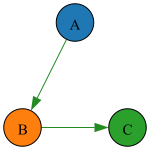

In [2]:

hypotheses = {
    'test': {
        'edges': [(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)],
        'edge_color': [1, 1, 1, 1, 1, 1]
    },
    'ccause': {
        'edges': [(0, 1), (0, 2)],
        'edge_color': [2, 2]
    },
    'collider': {
        'edges': [(0, 2), (1, 2)],
        'edge_color': [2, 2]
    },
    'chain': {
        'edges': [(0, 1), (1, 2)],
        'edge_color': [2, 2]
    },
    'confound': {
        'edges': [(0, 1), (0, 2), (1, 2)],
        'edge_color': [2, 2, 2]
    },
    'damped': {
        'edges': [(0, 1), (0, 2), (1, 2)],
        'edge_color': [2, 3, 2]
    },
    'chain_lc': {
        'edges': [(0, 1), (0, 2), (1, 2)],
        'edge_color': [2, 2, 2]
    },
    'confound_lc': {
        'edges': [(0, 1), (0, 2), (1, 2)],
        'edge_color': [2, 2, 2]
    },
    'damped_lc': {
        'edges': [(0, 1), (1, 2)],
        'edge_color': [2, 2]
    }
}

h = 'damped_lc' 

edges = hypotheses[h]['edges']
variables = ['A', 'B', 'C']
graph = ig.Graph(edges, directed=True)
graph.vs['variables'] = variables
print(graph.vs['variables'])
graph.vs['observed'] = [4, 5, 6]

color_dict = {0: 'white', 1: 'lightgreen', 2:'lightgrey'}
 
color_dict = {0: 'white', 1: 'black', 2: 'lightgreen', 3:'lightsalmon', 
              4:(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
              5: (1.0, 0.4980392156862745, 0.054901960784313725),
              6: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)}
edge_color_dict = {0: 'white', 1: 'black', 2: 'forestgreen', 3:'orangered',
                   4:(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
                   5: (1.0, 0.4980392156862745, 0.054901960784313725),
                   6: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)}

layout = [(0.5, 0.1), (0.3, 0.5), (0.7, 0.5)]
visual_style = {}
size = 150
visual_style["vertex_size"] = .25 * size
visual_style['vertex_label_size'] = .1 * size
visual_style['vertex_font'] = ['Times New Roman' for _ in graph.vs['observed']]
visual_style["vertex_color"] = [color_dict[obs] for obs in graph.vs["observed"]]
visual_style["vertex_label"] = graph.vs["variables"]
#visual_style["vertex_label_dist"] = 0.1
#visual_style["vertex_label_angle"] = 1.2*np.pi
visual_style['edge_width'] = 1
visual_style['edge_arrow_width'] = 1
visual_style['edge_curved'] = 0
visual_style["layout"] = layout
visual_style["bbox"] = (size, size)
visual_style["margin"] = .15*size

visual_style['edge_color'] = [edge_color_dict[edge] for edge in hypotheses[h]['edge_color']]


ig.plot(graph, **visual_style).save(f'./plots/{h}_coloured.pdf')
ig.plot(graph, **visual_style)#.save(f'.//plots//{h}.png')

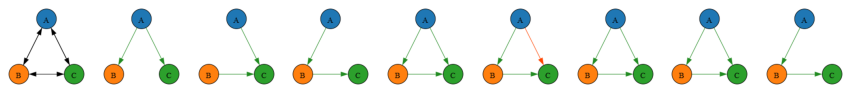

In [4]:
fig, axs = plt.subplots(1, len(list(hypotheses.keys())), figsize=(15, 7))

for i, h in enumerate(hypotheses.keys()):
    #print(hypotheses[h]['edges'])
    graph = ig.Graph(hypotheses[h]['edges'], directed=True)
    graph.vs['variables'] = variables
    graph.vs['observed'] = [0, 0, 0]
    #print(graph.vs['variables'])

    visual_style['edge_color'] = [edge_color_dict[edge] for edge in hypotheses[h]['edge_color']]
    ig.plot(graph,**visual_style).save(f'./plots/{h}.pdf')
    ig.plot(graph,**visual_style).save(f'./plots/{h}.png')
    img = mpimg.imread(f'.//plots//{h}.pdf')
    axs[i].imshow(img)
    #os.remove('temporary.png')
    axs[i].axis('off')

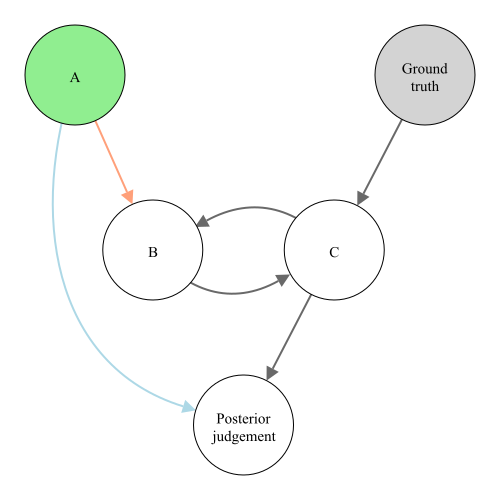

In [6]:
edges = [(0, 1), (0, 4), (1, 2), (2, 1), (3, 2), (2, 4)]
variables = ['Prior\njudgement', 'Actions', 'Data', 'Ground\ntruth', 'Posterior\njudgement']
variables = ['A', 'B', 'C', 'Ground\ntruth', 'Posterior\njudgement']
G = ig.Graph(edges, directed=True)
G.vs['variables'] = variables
G.vs['observed'] = [1, 0, 0, 2, 0]

hypotheses = [1, 2, 0, 0, 0, 0]
color_dict = {0: 'white', 1: 'lightgreen', 2:'lightgrey'}
edge_color_dict = {
    'h1': {0: 'dimgrey', 1: 'white', 2:'white'},
    'h2': {0: 'dimgrey', 1: 'white', 2:'lightblue'},
    'h3': {0: 'dimgrey', 1: 'lightsalmon', 2:'lightblue'}
}


layout = [(0.4, 0.35), (0.46, 0.5), (0.6, 0.5), (0.67, 0.35), (0.53, 0.65)]
visual_style = {}
size = 500
visual_style["vertex_size"] = .20 * size
visual_style['vertex_label_size'] = .03 * size
visual_style['vertex_font'] = ['Times New Roman' for _ in G.vs['observed']]
visual_style["vertex_color"] = [color_dict[obs] for obs in G.vs["observed"]]
visual_style["vertex_label"] = G.vs["variables"]
visual_style['edge_width'] = 2
visual_style['edge_arrow_width'] = 1.5
visual_style['edge_curved'] = [0, 0.5, 0.5, 0.5, 0, 0]
visual_style["layout"] = layout
visual_style["bbox"] = (size, size)
visual_style["margin"] = .15*size

visual_style['edge_color'] = [edge_color_dict['h3'][obs] for obs in hypotheses]


ig.plot(G, **visual_style)

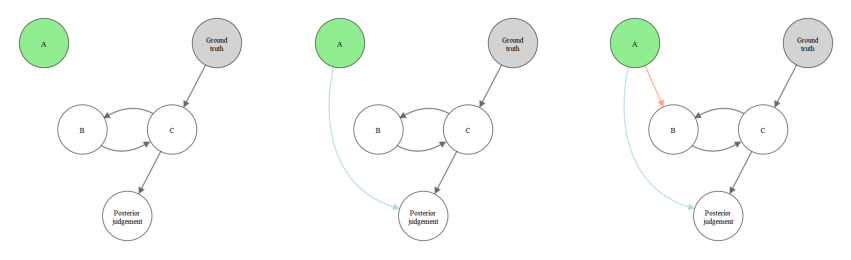

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

for i, h in enumerate(edge_color_dict.keys()):

    visual_style['edge_color'] = [edge_color_dict[h][obs] for obs in hypotheses]
    ig.plot(G,**visual_style).save(f'.//plots//{h}.png')
    img = mpimg.imread(f'.//plots//{h}.png')
    axs[i].imshow(img)
    #os.remove('temporary.png')
    axs[i].axis('off')